<a href="https://colab.research.google.com/github/TheBlondMyth/AlgoTrading/blob/main/NB1.1_Simple_NN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing standard packages


---


At the beginning of the program, we need to import several libraries:

*   "numpy" (Numerical Python) is the standard package covering lot of mathematical functionalities like basic math functions, array/vector/matrix operations, random number generation, etc
*   "matplotlib.pyplot" is the package used for plotting figures
*   "tensorflow" is an open-source library developed by Google Brain for deep learning (https://www.tensorflow.org/)

Any other additional packages can be imported as required.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Preparing the data


---


The first step of a machine learning problem is to prepare the data (which is probably the most time-consuming part of the problem). In this very simple exercise, we will work with simulated data since our main focus is to illustrate how a neural network is programmed.

We will generate $N$ samples of data $(x^i,y^i)$ as follows:

1.   Create a list of $N$ feature values via $x^i:=10(i-1)/(N-1)$ for $i=1,...,N$ such that $x^i$'s are $N$ uniformly-spaced numbers in the interval $[0,10]$.
2.   Generate values of the label $y^i$ via
\begin{align}
y^i=\sin x^i + \sin 2x^i \qquad \text{for }i=1,...,N
\end{align}

Our goal is to see if we can build and train a neural network which learns the ``true mechanism'' $f(x)=\sin x+\sin 2x$ from the simulated data $(x^i,y^i)$.

In our example we set $N=50000$. The following codes generate and plot the samples $(x^i,y^i)$.

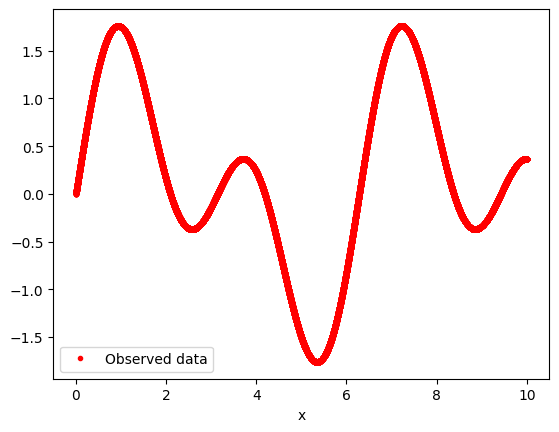

In [ ]:
N = 50000           # number of samples

obs_x = np.linspace(0, 10, N)                 # create an array of N evenly-spaced elements in [0,10]
obs_y = np.sin(obs_x)+ np.sin(2* obs_x)       # compute the values of the corresponding label

# Plot the simulated data
plt.plot(obs_x, obs_y, 'r.', label="Observed data")
plt.xlabel('x')
plt.legend()

# Coding a neural network


---


Let's build a neural network to describe the data. As an example, we consider a feedforward neural network (FNN) with the following structure:
*   2 hidden layers
*   Each hidden layer has 50 neurons
*   ReLU activation functions at the hidden layers; and identity function at the output layer (i.e. no activation function applied at the output layer)


The following code builds a neural network object with name "MyModel" representing such a FNN.
*   "**Sequential(...)**" is the function from the TensorFlow library which creates a FNN object, and its structure can be further defined by the arguments inside the parentheses.
*   The first line "**tf.keras.layers.Dense(50, activation="relu", input_shape=(1,))**" tells the program that the first hidden layer has 50 neurons with ReLU activation function. The argument "input_shape=(1,)" is to let the program know that our input feature is one-dimensional real number ($\mathbb{R}$) only.
*   The second line "**tf.keras.layers.Dense(50, activation='relu')**" adds a second hidden layer of 50 neurons and ReLU activation function on top of the first one.
*   The final line "**tf.keras.layers.Dense(1, activation='linear')**" adds another layer of 1 neuron only with an identity activation function. Since this is the last layer we declare, this is interpreted by the program as the output layer. We must specify the number of neuron as 1 here because the output label space is one-dimensional ($\mathbb{R}$) and the output layer must contain exactly one neuron.

Other activation functions are available. See [here](https://keras.io/api/layers/activations/) for example.

  

In [ ]:
MyModel = tf.keras.models.Sequential([
  tf.keras.layers.Dense(50, activation="relu", input_shape=(1,)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

After building the model, we can use the command "**summary()**" to see the structure and the total number of model parameters of our defined model. Compare the displayed information against our formula for the total number of parameters
\begin{align}
\sum_{i=1}^{K+1}(d_{i}+d_{i}\times d_{i-1}).
\end{align}

In [ ]:
MyModel.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,701 (10.55 KB)

 Trainable params: 2,701 (10.55 KB)

 Non-trainable params: 0 (0.00 B)

# Model training


---


Next, we configurate the hyperparameters related to the model training (i.e. the numerical algorithm which minimises a chosen loss function) via the command "**compile**". This example is a regression task, and we choose our loss function as the squared loss $\ell(y,\hat{y})=(y-\hat{y})^2$ which comes with the library as **"mean_squared_error"**. Other possible choices for regression task include "mean_absolute_error", "huber_loss", "log_cosh", etc. For binary classification task, one can consider "binary_crossentropy". (See here for the documentation https://keras.io/api/losses/)

There are several other training settings that can be tuned by "compile" as well (to be explored in Topic 3).

In [ ]:
MyModel.compile(loss="mean_squared_error")

Now we can pass the observed features (x-variables) and labels (y-variable) to the model and perform training (i.e. solving for the model parameters of the bias vectors and weighting matrices withing the neural network). This is done by the function "**fit**", where at minimum we need to pass the arrays (or the *tensors*) of the features data and labels data to the function.

Theoretical details behind the training process will be discussed later in the course. The option "verbose=0" tells the program to supress all the displayed messages of the training progress (which helps speed up the program, plus we will talk about how to read the training messages later). We will discuss what "epochs" means in Topic 3 as well. But very loosely speaking, larger the "epochs" value longer the training duration and in turn a lower loss function value can be achieved.

In [ ]:
MyModel.fit(obs_x, obs_y, epochs=10, verbose=0)

# Evaluate the fitted model


---

Now the training is done and the estimated optimal model parameters are stored inside the "MyModel" object. We can look at the prediction of the model $\hat{y}^i=f_{NN}(x^i)$ and compare them against the actual data $y^i$. The predictions are generated by the command **"predict"**.

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


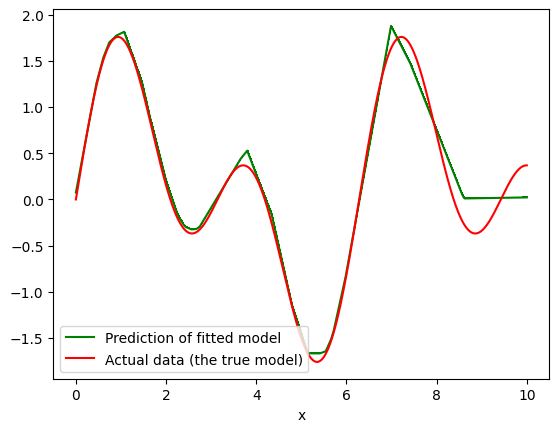

In [ ]:
pred_y = MyModel.predict(obs_x)

plt.plot(obs_x, pred_y, 'g-,', label="Prediction of fitted model")
plt.plot(obs_x, obs_y, 'r-', label="Actual data (the true model)")
plt.xlabel('x')
plt.legend()

One can also look at the average loss between the actual data and the prediction. The command "evaluate(x,y)" computes
\begin{align*}
\frac{1}{N}\sum_{i=1}^N \ell(y^i,f(x^i;\boldsymbol{\theta})).
\end{align*}
Since the model parameters $\boldsymbol{\theta}$ have already been optimised, "MyModel.evaluate(obs_x, obs_y)" will give us average error after the optimisation is done, which should be a rather small number.

(Note that the "evaluate" command can also be applied to new data to see whetehr the performance of the model can generalise to unseen data.)

In [ ]:
optimised_loss = MyModel.evaluate(obs_x, obs_y, verbose=0)  # use verbose=0 to supress some displayed message of the evaluation
print("Optimised loss function value is: ", optimised_loss)

Optimised loss function value is:  0.018369315192103386
